In [11]:
import ot
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

from utils.plot import scatterplot
from utils.plot import discrete_gamma_marg
from utils.plot import plot_gamma_with_marginals
from utils.preprocessing import feature_normalization

plt.style.use('science')

plt.rcParams['mathtext.fontset'] = 'custom' 
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans' 
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic' 
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold' 
plt.rcParams['font.size'] = 16 
plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams['font.family'] = 'STIXGeneral'

## Ilustration of OT

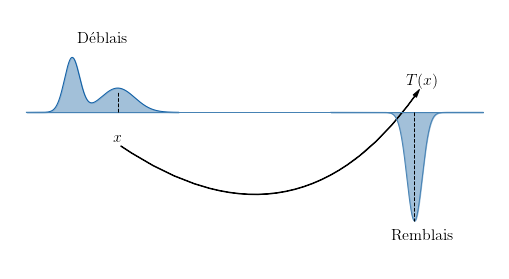

In [5]:
t = np.linspace(-1, 1, 1000)

a = np.exp(- (t + 0.4) ** 2 / (2 * 0.01)) / np.sqrt(2 * np.pi * 0.01)
b = np.exp(- (t - 0.2) ** 2 / (2 * 0.05)) / np.sqrt(2 * np.pi * 0.05)
c = np.exp(- (t - 0.1) ** 2 / (2 * 0.01)) / np.sqrt(2 * np.pi * 0.01)

marg_x = (a + b) / sum(a + b)
marg_y = c / sum(c)

fig, ax = plt.subplots(1, 1, figsize=(9, 5))

ax.set_ylim([-0.012, 0.008])
ax.plot(t, marg_x); plt.plot(t + 4, -marg_y, color='steelblue')
ax.plot(t, [0] * len(t), color='steelblue')

plt.plot(t + 2, [0] * len(t), color='steelblue')
plt.plot(t + 4, [0] * len(t), color='steelblue')

ax.fill_between(t + 4, [0] * len(t), - marg_y, color='steelblue', alpha=0.5)
ax.fill_between(t, [0] * len(t), marg_x, color='steelblue', alpha=0.5)
ax.plot([4.1, 4.1], [0.0, -0.008], c='black', linestyle='--')
ax.plot([0.2, 0.2], [0.0, 0.0015], c='black', linestyle='--')

ax.text(0.2, -0.0022, r'$x$', horizontalalignment='center')
ax.text(4.2, 0.002, r'$T(x)$', horizontalalignment='center')
ax.text(0.0, 0.005, r'Déblais', horizontalalignment='center')
ax.text(4.2, -0.0095, r'Remblais', horizontalalignment='center')

style = "Simple, tail_width=0.5, head_width=4, head_length=8" 
kw = dict(arrowstyle=style, color="k")
a3 = patches.FancyArrowPatch((0.22, -0.0024), (4.18, 0.0018), connectionstyle="arc3,rad=.5", **kw)
ax.add_patch(a3)
ax.axis('off')

plt.savefig('./Figures/Ch4/OT_Monge.pdf', transparent=True)

## Trivial Coupling

### Continuous

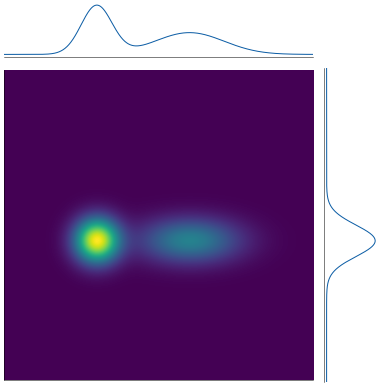

In [6]:
t = np.linspace(-1, 1, 1000)

a = np.exp(- (t + 0.4) ** 2 / (2 * 0.01)) / np.sqrt(2 * np.pi * 0.01)
b = np.exp(- (t - 0.2) ** 2 / (2 * 0.05)) / np.sqrt(2 * np.pi * 0.05)
c = np.exp(- (t - 0.1) ** 2 / (2 * 0.01)) / np.sqrt(2 * np.pi * 0.01)

marg_x = (a + b) / sum(a + b)
marg_y = c / sum(c)

trivial = np.zeros([len(t), len(t)])
for x in range(len(t)):
    for y in range(len(t)):
        trivial[x, y] = marg_x[x] * marg_y[y]
plot_gamma_with_marginals(trivial.T, marg_x, marg_y, cmap='viridis', height=6)
plt.savefig('./Figures/Ch4/TrivialCoupling.pdf', transparent=True)

### Discrete

In [2]:
t = np.linspace(-1, 1, 20)

a = np.exp(- (t + 0.4) ** 2 / (2 * 0.01)) / np.sqrt(2 * np.pi * 0.01)
b = np.exp(- (t - 0.2) ** 2 / (2 * 0.05)) / np.sqrt(2 * np.pi * 0.05)
c = np.exp(- (t - 0.1) ** 2 / (2 * 0.01)) / np.sqrt(2 * np.pi * 0.01)

marg_x = (a + b) / sum(a + b)
marg_y = c / sum(c)

trivial = np.zeros([len(t), len(t)])
for x in range(len(t)):
    for y in range(len(t)):
        trivial[x, y] = marg_x[x] * marg_y[y]

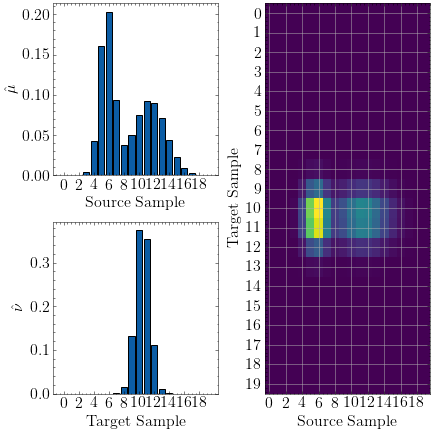

In [24]:
fig = plt.figure(constrained_layout=True, figsize=(6, 6))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[:, 1])
ax1.imshow(trivial.T, aspect='auto', cmap='viridis')
ax1.grid()
_ = ax1.set_yticks([i for i in range(20)])
_ = ax1.set_xticks([i for i in range(0, 20, 2)])
ax1.set_xlabel('Source Sample')
ax1.set_ylabel('Target Sample')
ax2 = fig.add_subplot(gs[0, 0])
ax2.bar(np.arange(len(marg_x)), marg_x, edgecolor='k')
ax2.set_xlabel('Source Sample')
ax2.set_ylabel(r'$\hat{\mu}$')
_ = ax2.set_xticks([i for i in range(0, 20, 2)])
ax3 = fig.add_subplot(gs[1, 0])
ax3.bar(np.arange(len(marg_y)), marg_y, edgecolor='k')
_ = ax3.set_xticks([i for i in range(0, 20, 2)])
ax3.set_xlabel('Target Sample')
ax3.set_ylabel(r'$\hat{\nu}$')

plt.savefig('./Figures/Ch4/TrivialCoupling.pdf', transparent=True)

## Entropic Regularization

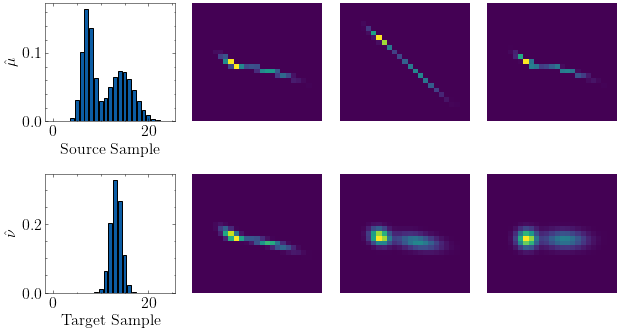

In [37]:
t = np.linspace(-1, 1, 25)

a = np.exp(- (t + 0.4) ** 2 / (2 * 0.01)) / np.sqrt(2 * np.pi * 0.01)
b = np.exp(- (t - 0.2) ** 2 / (2 * 0.05)) / np.sqrt(2 * np.pi * 0.05)
c = np.exp(- (t - 0.1) ** 2 / (2 * 0.01)) / np.sqrt(2 * np.pi * 0.01)

marg_x = (a + b) / sum(a + b)
marg_y = c / sum(c)

penalties = [0.0, 1e-4, 1e-3, 1e-2, 1e-1, 1]
M = ot.dist(t[..., np.newaxis], t[..., np.newaxis])

fig, _axes = plt.subplots(2, 4, figsize=(9, 5))
zero_ratio = []

axes = _axes[:, 1:]

for reg, ax in zip(penalties, axes.flatten()):
    if reg == 0.0:
        G = ot.emd(marg_x, marg_y, M)
    else:
        G = ot.sinkhorn(marg_x, marg_y, M, reg=reg)
    zero_ratio.append(100 * (1 - len(np.where(np.isclose(G, 0))[0]) / (G.shape[0] * G.shape[1])))
    ax.imshow(G.T, aspect='auto', cmap='viridis')
    ax.axis('off')
# _axes[0, 0].plot(np.arange(len(marg_x)), marg_x)
_axes[0, 0].bar(np.arange(len(marg_x)), marg_x, edgecolor='k')
_axes[0, 0].set_xlabel('Source Sample')
_axes[0, 0].set_ylabel(r'$\hat{\mu}$')

# _axes[1, 0].plot(np.arange(len(marg_y)), marg_y)
_axes[1, 0].bar(np.arange(len(marg_y)), marg_y, edgecolor='k')
_axes[1, 0].set_xlabel('Target Sample')
_axes[1, 0].set_ylabel(r'$\hat{\nu}$')
plt.tight_layout()

plt.savefig('./Figures/Ch4/SinkhornEMD.pdf', transparent=True)

## Sparsity Analysis

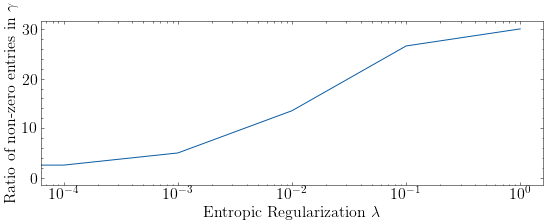

In [9]:
fig, ax = plt.subplots(figsize=(9, 3))
ax.plot(penalties, zero_ratio)
ax.set_xscale('log')
ax.set_ylabel(r'Ratio of non-zero entries in $\gamma$')
ax.set_xlabel(r'Entropic Regularization $\lambda$')
plt.savefig('./Figures/Ch4/Sparsity_Analysis.pdf', transparent=True)

In [10]:
G = ot.emd(marg_x, marg_y, M)
print('Ratio of nonzero entries: {}'.format(100 * (1 - len(np.where(G == 0)[0]) / (G.shape[0] * G.shape[1]))))
print('Number of nonzero entries: {}'.format(G.shape[0] * G.shape[1] - len(np.where(G == 0)[0])))

Ratio of nonzero entries: 0.1998999999999973
Number of nonzero entries: 1999


In [11]:
G = ot.sinkhorn(marg_x, marg_y, M, reg=1e-1)
n_entries = G.shape[0] * G.shape[1]
nonzero_entries = (G.shape[0] * G.shape[1] - len(np.where(np.isclose(G, 0))[0]))
print('Ratio of nonzero entries: {}'.format(100 * (nonzero_entries / n_entries)))
print('Number of nonzero entries: {}'.format(nonzero_entries))

Ratio of nonzero entries: 26.584600000000002
Number of nonzero entries: 265846


## Example: Two Tanks data

In [22]:
data = np.load('./data/1_ttanks_acf_0.05.npy')
d = data[:, -1]
X = data[:, :-2]
X = feature_normalization(X)
y = data[:, -2]

lnames_source = ["$C_{" + str(int(yi)) +  "}$" for yi in y[np.where(d == 0)[0]]]
lnames_target = ["$C_{" + str(int(yi)) +  "}$" for yi in y[np.where(d == 1)[0]]]

Xs, ys = X[np.where(d == 0)[0]], y[np.where(d == 0)[0]]
Xt, yt = X[np.where(d == 11)[0]], y[np.where(d == 11)[0]]

a, b, M = ot.unif(Xs.shape[0]), ot.unif(Xt.shape[0]), ot.dist(Xs, Xt)
Gemd = ot.emd(a, b, M)
Gskh = ot.sinkhorn(a, b, M, reg=1e-2)

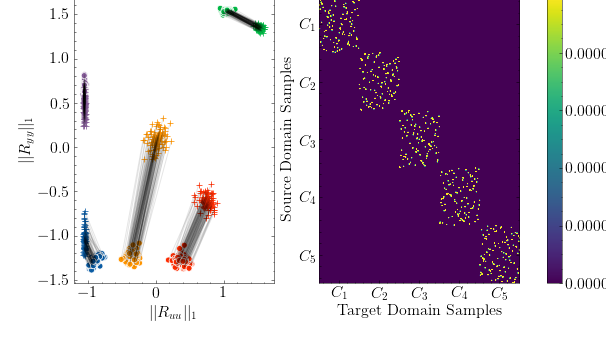

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

ax = axes[0]
sns.scatterplot(Xs[:, 0], Xs[:, 1], ax=ax, hue=lnames_source)
sns.scatterplot(Xt[:, 0], Xt[:, 1], ax=ax, hue=lnames_target, marker='+', legend=False)

for i in range(len(Xs)):
    for j in range(len(Xt)):
        if Gemd[i, j] > 0.0:
            ax.plot([Xs[i, 0], Xt[j, 0]], [Xs[i, 1], Xt[j, 1]], 'k', alpha=0.1)
ax.set_ylabel('$||R_{yy}||_{1}$')
ax.set_xlabel('$||R_{uu}||_{1}$')
ax.legend().remove()
            
ax = axes[1]
ax.imshow(Gemd, cmap='viridis', aspect='auto', vmin=0.0, vmax=1e-4)
_ = ax.set_yticks([50, 150, 250, 350, 450])
_ = ax.set_yticklabels([r"$C_{1}$", r"$C_{2}$", r"$C_{3}$", r"$C_{4}$", r"$C_{5}$"])
_ = ax.set_xticks([50, 150, 250, 350, 450])
_ = ax.set_xticklabels([r"$C_{1}$", r"$C_{2}$", r"$C_{3}$", r"$C_{4}$", r"$C_{5}$"])
ax.set_ylabel('Source Domain Samples')
ax.set_xlabel('Target Domain Samples')

plt.tight_layout()

norm = mpl.colors.Normalize(vmin=0, vmax=1e-4)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
cbar =  fig.colorbar(cmap, ax=axes.ravel().tolist())

plt.savefig('./Figures/Ch4/EMD_TTanks.pdf', transparent=True)

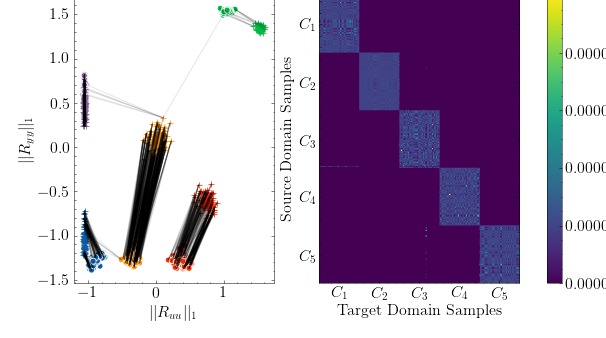

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

ax = axes[0]
sns.scatterplot(Xs[:, 0], Xs[:, 1], ax=ax, hue=lnames_source)
sns.scatterplot(Xt[:, 0], Xt[:, 1], ax=ax, hue=lnames_target, marker='+', legend=False)

for i in range(len(Xs)):
    for j in range(len(Xt)):
        if Gskh[i, j] > 5e-5:
            ax.plot([Xs[i, 0], Xt[j, 0]], [Xs[i, 1], Xt[j, 1]], 'k', alpha=0.1)
ax.set_ylabel('$||R_{yy}||_{1}$')
ax.set_xlabel('$||R_{uu}||_{1}$')
ax.legend().remove()
            
ax = axes[1]
ax.imshow(Gskh, cmap='viridis', aspect='auto', vmin=0.0, vmax=1e-4)
_ = ax.set_yticks([50, 150, 250, 350, 450])
_ = ax.set_yticklabels([r"$C_{1}$", r"$C_{2}$", r"$C_{3}$", r"$C_{4}$", r"$C_{5}$"])
_ = ax.set_xticks([50, 150, 250, 350, 450])
_ = ax.set_xticklabels([r"$C_{1}$", r"$C_{2}$", r"$C_{3}$", r"$C_{4}$", r"$C_{5}$"])
ax.set_ylabel('Source Domain Samples')
ax.set_xlabel('Target Domain Samples')

plt.tight_layout()

norm = mpl.colors.Normalize(vmin=0, vmax=1e-4)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
cbar =  fig.colorbar(cmap, ax=axes.ravel().tolist())

plt.savefig('./Figures/Ch4/Sinkhorn_TTanks.pdf', transparent=True)